In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
import sys

In [2]:
from escape.parse import swissfel
from jungfrau_utils import apply_gain_pede, apply_geometry

sys.path.insert(0, '../src/')
from data_analysis import *
from masking import *

In [3]:
path = '/sf/bernina/data/p17743/res/scan_info/'
run = '0019_droplets_10um_2mm'
num_shots = 100
process_run(run, path, num_shots=num_shots, iq_threshold=0)

-- Loading data:/sf/bernina/data/p17743/res/scan_info/run0019_droplets_10um_2mm.json
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 3
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 3
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH

run0019_droplets_10um_2mm - s.51 - 2.1 Hz - 1.55 photon/pix
run0019_droplets_10um_2mm - s.52 - 2.1 Hz - 0.22 photon/pix
run0019_droplets_10um_2mm - s.53 - 2.1 Hz - 0.42 photon/pix
run0019_droplets_10um_2mm - s.54 - 2.0 Hz - 0.66 photon/pix
run0019_droplets_10um_2mm - s.55 - 2.1 Hz - 0.22 photon/pix
run0019_droplets_10um_2mm - s.56 - 2.0 Hz - 0.89 photon/pix
run0019_droplets_10um_2mm - s.57 - 2.0 Hz - 0.62 photon/pix
run0019_droplets_10um_2mm - s.58 - 2.0 Hz - 0.16 photon/pix
run0019_droplets_10um_2mm - s.59 - 2.1 Hz - 0.22 photon/pix
run0019_droplets_10um_2mm - s.60 - 2.0 Hz - 1.57 photon/pix
run0019_droplets_10um_2mm - s.61 - 2.0 Hz - 0.25 photon/pix
run0019_droplets_10um_2mm - s.62 - 2.0 Hz - 0.25 photon/pix
run0019_droplets_10um_2mm - s.63 - 2.1 Hz - 1.44 photon/pix
run0019_droplets_10um_2mm - s.64 - 2.0 Hz - 0.29 photon/pix
run0019_droplets_10um_2mm - s.65 - 2.0 Hz - 0.19 photon/pix
run0019_droplets_10um_2mm - s.66 - 2.0 Hz - 1.01 photon/pix
run0019_droplets_10um_2mm - s.67 - 2.0 H

In [4]:
h5path = '/sf/bernina/data/p17743/res/work/hdf5/run%s_tmp.h5'%run
h5file = h5py.File(h5path,'r')
img = h5file['JF7/2D_sum'][:]
r  = h5file['JF7/Q_bins'][:]
Iq = h5file['JF7/I_Q'][:]
i0 = h5file['JF3/i0'].value 
nshots = h5file['JF7/num_shots'].value
q = q_scale(r, detector_distance=0.12)
img/=nshots
print(nshots)

100


<IPython.core.display.Javascript object>


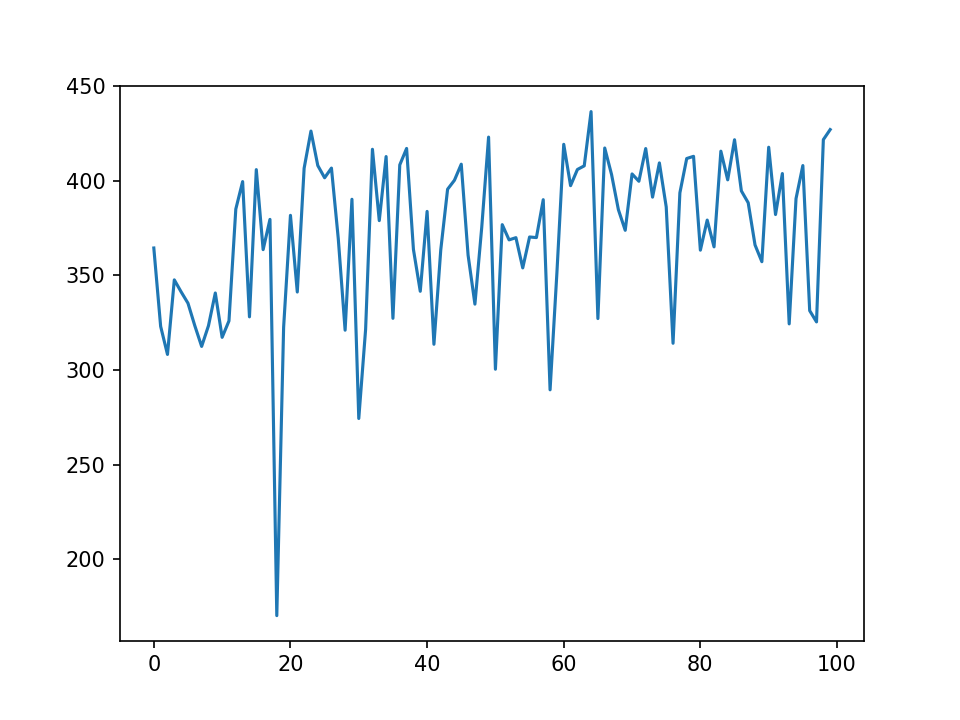

In [5]:
plt.figure()
plt.plot(i0[:nshots])
plt.show()

<IPython.core.display.Javascript object>


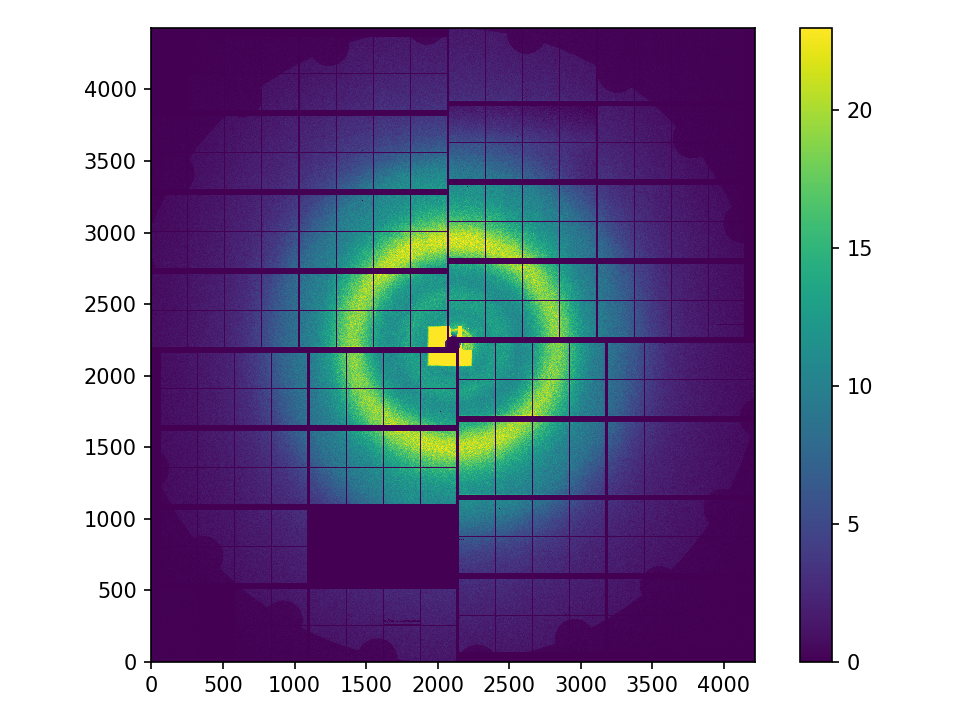

In [6]:
plt.figure()
plt.imshow(img,clim=[0,23],origin='lower')
plt.colorbar()
plt.tight_layout()
plt.show()

In [7]:
#normalise to i0
i0_mean = np.average(i0[:nshots])
norm = i0/i0_mean

Iq_norm = np.zeros(Iq.shape)
for i in range(nshots):
    Iq_norm[i]=Iq[i]/norm[i]

<IPython.core.display.Javascript object>


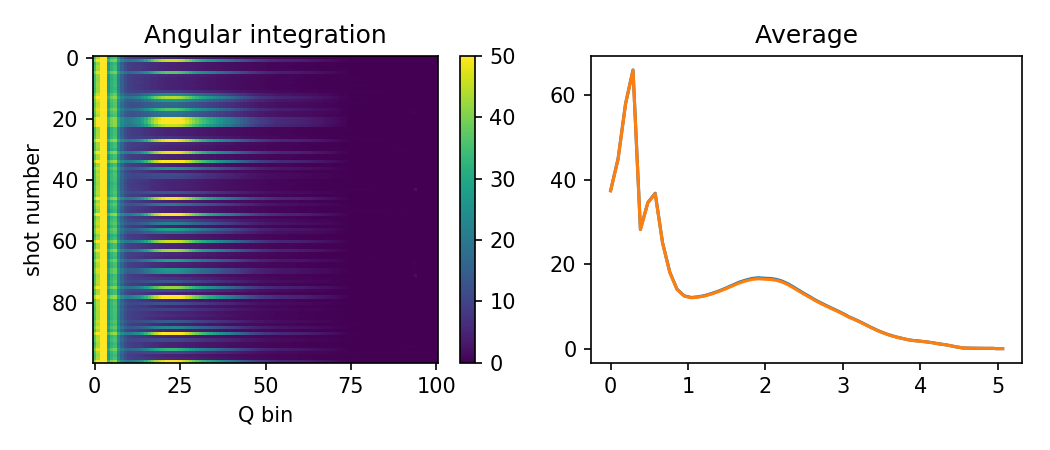

In [8]:
plt.figure(figsize=[7,3])

plt.subplot(1,2,1)
plt.imshow(Iq_norm,aspect='auto',clim=[0,50])
plt.title('Angular integration')
plt.xlabel('Q bin')
plt.ylabel('shot number')
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Average')
plt.plot(q, np.average(Iq,axis=0))
plt.plot(q, np.average(Iq_norm,axis=0))

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


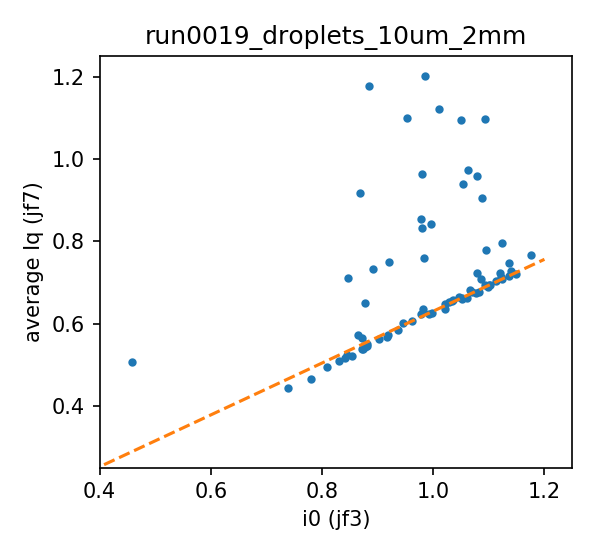

In [9]:
plt.figure(figsize=[4,3.7])
x = i0[:nshots]/np.average(i0[:nshots])
y = np.average(Iq,axis=1)/np.average(np.average(Iq,axis=1))
plt.plot(x,y,'o',ms=3)

x = np.arange(0.,1.3,0.1)
a = 0.63
plt.plot(x,a*x,'--')
plt.xlabel('i0 (jf3)')
plt.ylabel('average Iq (jf7)')

plt.xlim(0.4,1.25)
plt.ylim(0.25,1.25)
plt.title('run%s'%run)
plt.tight_layout()
plt.show()

In [10]:
#define hits
iq_threshold = 5
iq_metric = Iq_norm[:,10:80].mean(axis=1)
hits = (iq_metric>iq_threshold)

hit rate: 39.000000


<IPython.core.display.Javascript object>


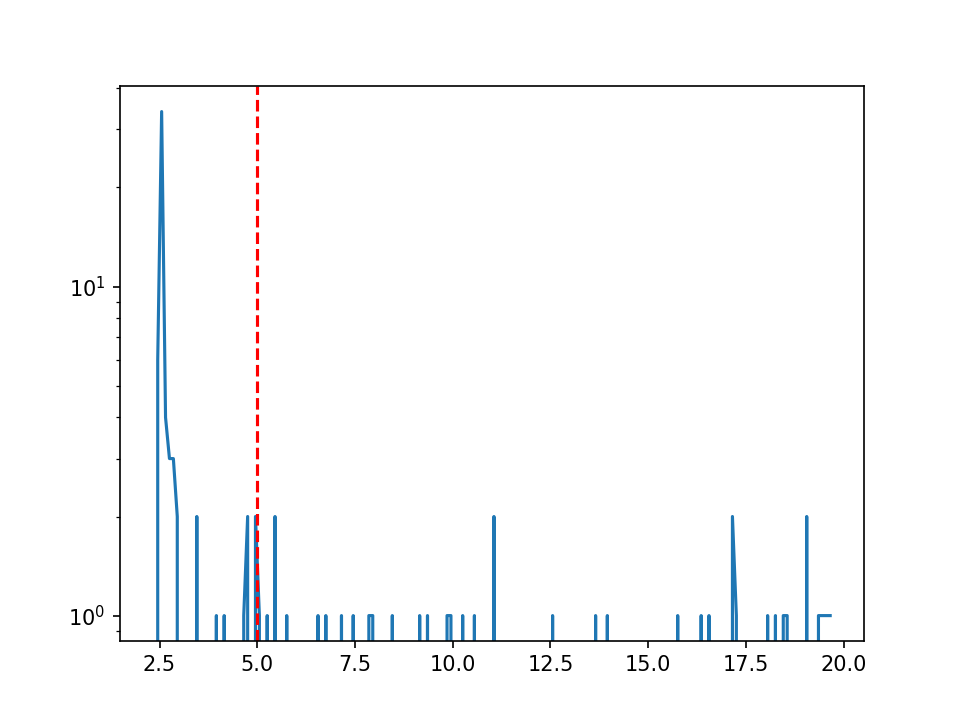

In [11]:
print('hit rate: %f'%(len(hits[hits>0])/nshots*100))

bi,bf,db = iq_metric.min(),iq_metric.max(),.1
bins = np.arange(bi-db,bf+db,db)
hy,hx = np.histogram(iq_metric,bins=bins)
bin_centers = np.array([(bins[j]+bins[j+1])/2. for j in range(len(bins)-1)])

plt.figure()
plt.plot(bin_centers, hy, label='data')
plt.yscale('log',nonposy='clip')
plt.axvline(x=iq_threshold,ls='--',c='r')
#plt.xlim(-.1,.2)
plt.show()